# Búsqueda del mejor modelo (No supervisados)

In [ ]:
import pandas as pd

df = pd.read_csv('../../../data/penguins/penguins.csv')

## **Validación cruzada**

En problemas no supervisados, no hay una variable objetivo para medir directamente el rendimiento del modelo. 

Sin embargo, la validación cruzada sigue siendo útil para:

- Evaluar la estabilidad de los resultados (por ejemplo, si los clústeres son consistentes entre diferentes particiones de datos).
- Identificar problemas de sobreajuste o subajuste.
- Comparar el rendimiento de diferentes configuraciones de hiperparámetros.


Ejemplo con K-Means con K-Folds:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
import numpy as np

# Datos de ejemplo
X = df[['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']].dropna()

# Configuración de K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

silhouette_scores_train = []
silhouette_scores_test = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    
    # Entrenar K-Means en el conjunto de entrenamiento
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_train)
    
    # Predecir clústeres en el conjunto de prueba
    labels = kmeans.predict(X_test)
    labels_tr = kmeans.predict(X_train)
    
    # Evaluar con Silhouette Score
    score = silhouette_score(X_test, labels)
    score_tr = silhouette_score(X_train, labels_tr)

    silhouette_scores_test.append(score)
    silhouette_scores_train.append(score_tr)

# Resultado promedio
print(f"Silhouette Score promedio test: {np.mean(silhouette_scores_test)}")
print(f"Silhouette Score promedio train: {np.mean(silhouette_scores_train)}")

### Adaptaciones Específicas por Tarea

| Tarea | Métrica | Ejemplo |
| --- | --- | --- |
| Clustering | Silhouette Score, ARI, NMI | Validación cruzada K-Fold o Bootstrap para evaluar la estabilidad de los clústeres. |
| Reducción de Dimensionalidad | Varianza Explicada | Dividir los datos y evaluar la varianza capturada en cada fold. |
| Asociación | Support, Confidence, Lift | Dividir transacciones y evaluar la consistencia de las reglas generadas. |

## **Curva de Aprendizaje**

La curva de aprendizaje muestra cómo el rendimiento del modelo cambia en función del tamaño del conjunto de datos de entrenamiento. 

En problemas no supervisados, esta curva se puede construir utilizando métricas específicas del algoritmo.

Ejemplo con K-Means:
- Métrica : Silhouette Score o Inercia.
- Procedimiento :
    - Entrena el modelo con diferentes tamaños de subconjuntos del dataset.
    - Evalúa la métrica seleccionada (por ejemplo, Silhouette Score) para cada tamaño.
    - Grafica el tamaño del conjunto de datos en el eje x y la métrica en el eje y.

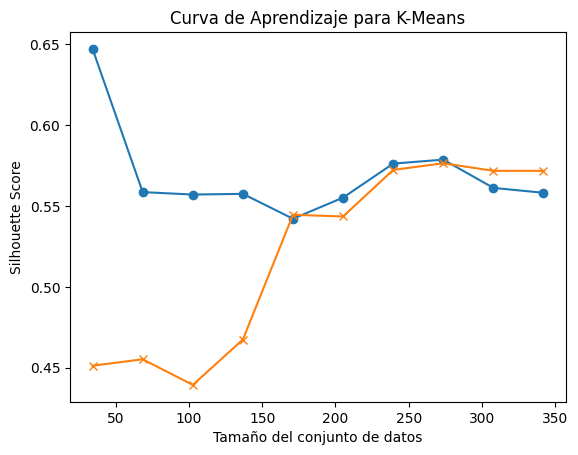

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar curva de aprendizaje para K-Means
sizes = np.linspace(0.1, 1.0, 10)  # Fracciones del dataset

scores = []
scores_train = []

for size in sizes:
    sample_size = int(size * X.shape[0])
    X_sample = X[:sample_size]
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    labels_tr = kmeans.predict(X_train)
    
    score = silhouette_score(X_sample, labels)
    score_tr = silhouette_score(X_train, labels_tr)

    scores.append(score)
    scores_train.append(score_tr)

# Graficar la curva de aprendizaje
plt.plot(sizes * X.shape[0], scores, marker='o')
plt.plot(sizes * X.shape[0], scores_train, marker='x')
plt.xlabel('Tamaño del conjunto de datos')
plt.ylabel('Silhouette Score')
plt.title('Curva de Aprendizaje para K-Means')
plt.show()

Interpretación:
- Si la métrica mejora significativamente al aumentar el tamaño del conjunto de datos, indica que el modelo necesita más datos para generalizar mejor.
- Si la métrica se estabiliza rápidamente, sugiere que el modelo ya está aprovechando bien los datos disponibles.

## **Curva de Validación**

La curva de validación evalúa el rendimiento del modelo en función de cambios en los hiperparámetros. En problemas no supervisados, esta curva se puede construir ajustando los hiperparámetros y evaluando métricas específicas.

Ejemplo con DBSCAN:
- Hiperparámetro : `eps` (radio de vecindad).
- Métrica : Número de clústeres o Silhouette Score.

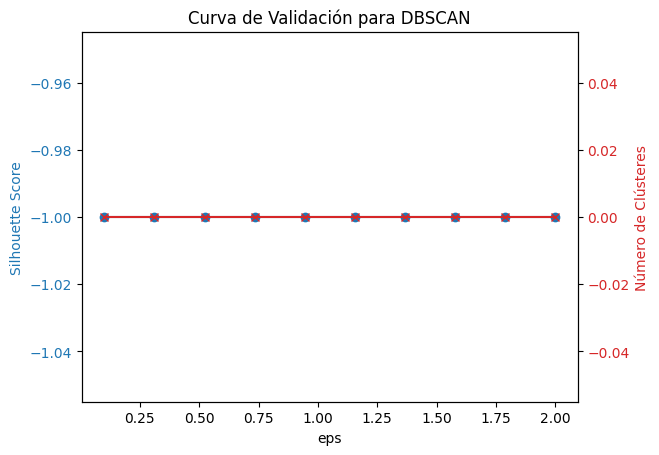

In [10]:
from sklearn.cluster import DBSCAN

# Probar diferentes valores de eps
eps_values = np.linspace(0.1, 2.0, 10)
scores = []
n_clusters = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # Solo evaluar si hay más de un clúster
        score = silhouette_score(X, labels)
        scores.append(score)
        n_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
    else:
        scores.append(-1)  # Asignar un valor bajo si no hay clústeres válidos
        n_clusters.append(0)

# Graficar la curva de validación
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('eps')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(eps_values, scores, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Número de Clústeres', color=color)
ax2.plot(eps_values, n_clusters, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Curva de Validación para DBSCAN')
plt.show()

Interpretación:
- La curva muestra cómo cambia la métrica (Silhouette Score) y el número de clústeres al variar eps.
- Un valor óptimo de eps equilibra un buen Silhouette Score con un número razonable de clústeres.

### Adaptaciones Específicas por Tarea

| Tarea | Métrica | Ejemplo |
| --- | --- | --- |
| Clustering | Silhouette Score, Inercia | Variación del Silhouette Score con el número de clústeres o tamaño del dataset. |
| Reducción de Dimensionalidad | Varianza Explicada | Varianza explicada acumulada en función del número de componentes (PCA). |
| Asociación | Support, Confidence, Lift | Cambio en las métricas al ajustar umbrales mínimos de soporte o confianza (Apriori). |

## **Afinar hiperparámetros**

- La búsqueda de hiperparámetros para algoritmos no supervisados es un proceso clave para optimizar el rendimiento del modelo, ya que los hiperparámetros controlan aspectos fundamentales del comportamiento del algoritmo. 
- A diferencia de los modelos supervisados, donde se puede usar métricas como precisión o F1-score para evaluar el rendimiento, en los modelos no supervisados la evaluación depende de métricas específicas para cada tipo de tarea (clustering, reducción de dimensionalidad, etc.). 



### 1. Métodos Generales para Búsqueda de Hiperparámetros
Existen varias estrategias para buscar hiperparámetros óptimos:

#### a) Grid Search
- Define una cuadrícula de valores posibles para cada hiperparámetro.
- Evalúa el modelo con todas las combinaciones posibles de hiperparámetros.
- Selecciona la combinación que maximice/minimice una métrica de evaluación específica.

Ejemplo con K-Means:

In [11]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()   ## IMPORTANTISIMO ##
scaler.fit(X)

X_scaled = scaler.transform(X)

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definir rango de valores para el hiperparámetro 'n_clusters'
param_grid = {'n_clusters': range(2, 10), 'max_iters': [10, 100, 1000]}

best_score = -1
best_params = {'n_clusters': None, 'max_iter': None}

for max_iter in param_grid['max_iters']:
    for n_clusters in param_grid['n_clusters']:
        kmeans = KMeans(n_clusters=n_clusters,
                        random_state=42, max_iter=max_iter)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score = score
            best_params['n_clusters'] = n_clusters
            best_params['max_iter'] = max_iter

print(f"Mejores parámetros: {best_params}, Silhouette Score: {best_score}")

Mejores parámetros: {'n_clusters': 2, 'max_iter': 10}, Silhouette Score: 0.5315403219473028


#### b) Random Search
- En lugar de probar todas las combinaciones posibles, selecciona aleatoriamente un subconjunto de combinaciones de hiperparámetros.
- Es más eficiente que Grid Search cuando el espacio de búsqueda es grande.

Ejemplo con DBSCAN:

In [15]:
from sklearn.cluster import DBSCAN
import numpy as np

# Definir rangos de valores para eps y min_samples
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(2, 10)

best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(set(labels)) > 1:  # Solo evaluar si hay más de un clúster
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Mejores parámetros: {best_params}, Silhouette Score: {best_score}")

Mejores parámetros: {'eps': 0.9, 'min_samples': 7}, Silhouette Score: 0.5128358008930426


### 2. Métricas de Evaluación para Algoritmos No Supervisados
La elección de la métrica depende del tipo de algoritmo y la tarea:

a) Clustering
- Silhouette Score : Mide qué tan bien están separados los clústeres entre sí y qué tan cohesionados están internamente.
- Davies-Bouldin Index : Cuanto menor sea el valor, mejor será la calidad del clustering.
- Calinski-Harabasz Index : Cuanto mayor sea el valor, mejor será la calidad del clustering.
- Inercia (K-Means) : La suma de las distancias cuadradas dentro de los clústeres (se busca minimizar).

b) Reducción de Dimensionalidad
- Varianza Explicada (PCA) : Proporción de la varianza total capturada por los componentes principales.
- Reconstrucción Error (NMF) : Diferencia entre los datos originales y los datos reconstruidos.
- Visualización (t-SNE/UMAP) : Subjetiva, basada en la separación visual de grupos.

c) Asociación
- Support : Frecuencia relativa de un conjunto de elementos.
- Confidence : Probabilidad condicional de que un conjunto de elementos ocurra junto a otro.
- Lift : Mide cuánto más probable es que un conjunto de elementos ocurra juntos en comparación con el azar.

## Ejercicio
- Para el dataset del Titanic busca el mejor modelo para identificar los grupos.